## **Homework 4**

Notes:
* Use proper LATEX formatting and notation for all mathematical equations, vectors, and matrices.
* For programming solutions: Properly add comments to your code.



---



### **Question 2: Linear Regression** (30 points)

In this problem, we would like to use a linear regressor to fit the data, where $\hat{y}(t)=at+b$ with $a,b$ being scalars. Let $\mathbf{x} = \begin{bmatrix} a \\ b \end{bmatrix}$ contain the regressor coefficients. Recall that the linear algebraic formula for least squares gives $\mathbf{x} = (A^\top A)^{-1} A^\top \mathbf{y}$ with $A^\dagger=(A^\top A)^{-1} A^\top$ known as the pseudo-inverse of $A$.

**a)** Implement 3 different ways to find the regressor coefficients using the numpy package and show that they agree on the random data generated below (make sure to calculate both $a$ and $b$):

- **i.** Calculate $\mathbf{x} $ directly from the least squares formula.
- **ii.** Use the function `np.linalg.pinv` to find the values of regressor coefficients $\mathbf{x} $.
- **iii.** Solve the problem using the builtin numpy function: `np.linalg.lstsq`

**b)** Plot a graph between $\mathbf{T}$ and $\mathbf{y}$, and overlay it with the linear regression line.

In [1]:
### !!! DO NOT EDIT !!!
# starter code to generate a random least squares regression dataset with 500 points
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# generate T and y
T, y =  datasets.make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1, bias=10, noise=25, random_state=42, coef=False)
print('Shape of T is:', T.shape)
print('Shape of y is:', y.shape)

Shape of T is: (500, 1)
Shape of y is: (500,)


[63.2502431]
[63.2502431]
[63.2502431]


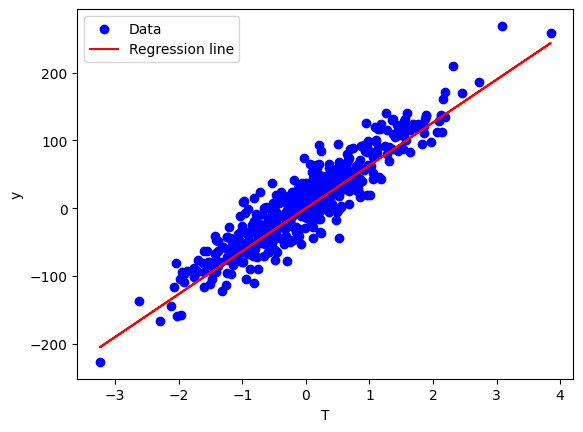

In [4]:
#######
# !!! YOUR CODE HERE !!!
# a
# i: calculate x directly using LS formula
x = np.linalg.inv(T.T @ T) @ T.T @ y
print(x)
# ii: use np.linalg.pinv to find values of regressor coefficients x
x_pinv = np.linalg.pinv(T) @ y
print(x_pinv)
# iii: use np.linalg.lstsg
x_lstsq, residuals, rank, s = np.linalg.lstsq(T, y)
print(x_lstsq)

# b
# plot the data points and the regression line
plt.scatter(T, y, color="blue", label="Data")
plt.plot(T, T * x, color="red", label="Regression line")
plt.xlabel("T")
plt.ylabel("y")
plt.legend()
plt.show()



---



### **Question 3: Logarithmic Regression** (30 points)

**a)** Write a function `my_func_fit (T,y)`, where $\mathbf{T}$ and $\mathbf{y}$ are column vectors of the same size containing experimental data. The function should return the values for $\alpha$ and $\beta$ which are the scalar parameters of the estimation function $$𝑦̂ (t)=𝛼t^𝛽$$.

Hint: Minimize least squares in log-space, i.e. $\min \sum_i (\log(\hat{y_i}) - \log(y_i))^2$

**b)** Test your code on the generated sample dataset and report the coefficients. The given piece of starter code generates a logarithmic dataset.

**c)** Draw a scatter plot between $\mathbf{T}$ vs $\mathbf{y}$, and overlay it with the regression line.   

You are only allowed to use numpy library functions.

In [5]:
### !!! DO NOT EDIT !!!
# starter code to generate a random exponential dataset
T = np.linspace(1, 10, 101)
y = 2*(T**(0.3)) + 0.3*np.random.random(len(T))
print('Shape of T is:', T.shape)
print('Shape of y is:', y.shape)

Shape of T is: (101,)
Shape of y is: (101,)


Fitted parameters: a = 2.1843524637849714, b = 0.2761693177292977


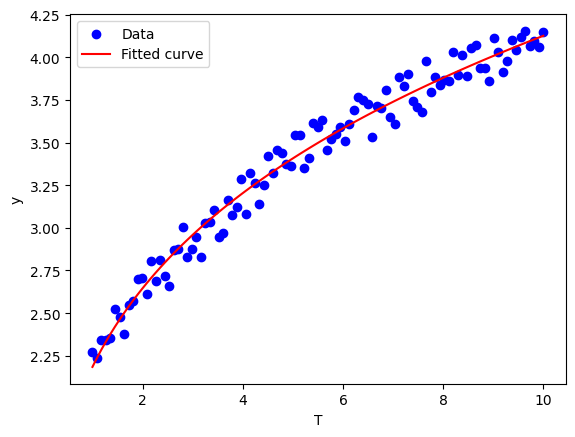

In [ ]:
#######
# !!! YOUR CODE HERE !!!
# a
def my_func_fit(T, y):
    log_T = np.log(T).reshape(-1, 1)
    log_y = np.log(y).reshape(-1, 1)
    A = np.hstack([log_T, np.ones_like(log_T)])
    coeffs, residuals, rank, s = np.linalg.lstsq(A, log_y)
    return np.exp(coeffs[1, 0]), coeffs[0, 0]
    
# b
a, b = my_func_fit(T, y)
print(f"Fitted parameters: a = {a}, b = {b}")
# c
y_fit = a * (T ** b)
plt.scatter(T, y, color="blue", label="Data")
plt.plot(T, y_fit, color="red", label="Fitted curve")
plt.xlabel("T")
plt.ylabel("y")
plt.legend()
plt.show()



---



### **Question 4: Functional Regression** (30 points)

**a)** Write a function `my_lin_regression(f, T, y)`, where `f` is a list containing function objects to pred-defined basis functions, and $\mathbf{T}$ and $\mathbf{y}$ are arrays containing noisy data. Assume that $\mathbf{T}$ and $\mathbf{y}$  are the same size, i.e, $T^{(i)}\in \mathbb{R}, y^{(i)}\in \mathbb{R}$.

Return an array `beta` which represents the coefficients of the solved problem. We are solving for $\beta$ which contains the coefficients in the regressor $$\hat{y} (t)=\beta_0 + 𝛽_1𝑓_1(t)+⋯+𝛽_n𝑓_n(t)$$ with $f_i$ being basis functions.

**b)** Also write a function `regression_plot(f,T,y,beta)` which plots a graph between $\mathbf{T}$ and $\mathbf{y}$ , and overlays it with the regression line.

Run the provided test scenarios provided below. First one uses f = [sin, cos] and second f = [exp]. Your code should plot regression lines that fit the data nicely.    

You are only allowed to use numpy library functions.

In [ ]:
#######
# !!! YOUR CODE HERE !!!
def my_lin_regression(f, T, y):
  n = len(f)
  m = len(T)
  A = np.zeros((m, n))
  for i in range(n):
    A[:, i] = f[i](T)
  A = np.hstack([np.ones((m, 1)), A])
  beta, residuals, rank, s = np.linalg.lstsq(A, y)
  return beta

def regression_plot(f, T, y, beta):
  plt.scatter(T, y, color="blue", label="Data")
  y_fit = np.zeros_like(y)
  y_fit += beta[0]
  for i in range(len(f)):
    y_fit += beta[i + 1] * f[i](T)
  plt.plot(T, y_fit, color="red", label="Regression line")
  plt.xlabel("T")
  plt.ylabel("y")
  plt.legend()
  plt.show()
#######

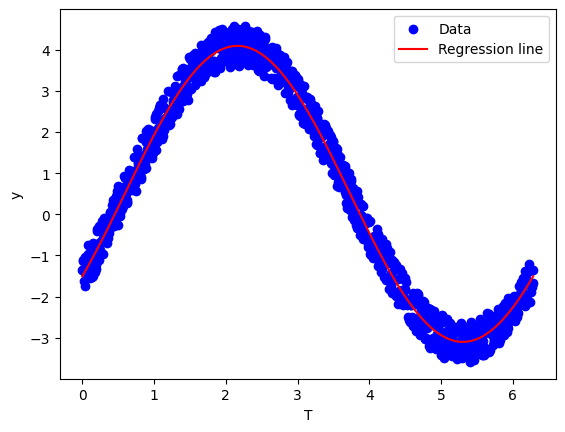

In [22]:
### !!! DO NOT EDIT !!!
### Test-1
T = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(T) - 2*np.cos(T) + np.random.random(len(T))
f = [np.sin, np.cos] # f1 = sin, f2 = cos

beta = my_lin_regression(f, T, y)
regression_plot(f,T,y,beta)

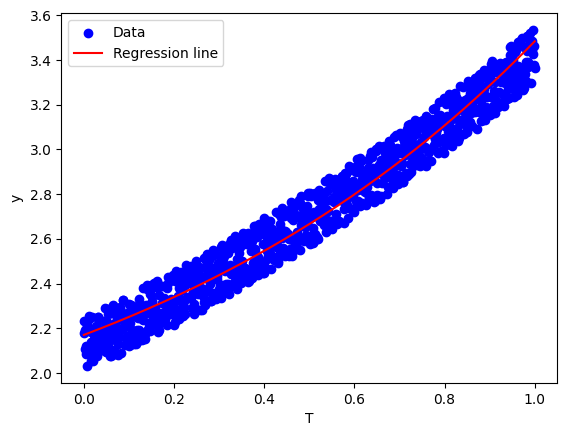

In [23]:
### !!! DO NOT EDIT !!!
### Test-2
T = np.linspace(0, 1, 1000)
y = 2*np.exp(0.5*T) + 0.25*np.random.random(len(T))
f = [np.exp] # f1 = exp

beta = my_lin_regression(f, T, y)
regression_plot(f,T,y,beta)



---



### **(BONUS) Question 5: Ridge Regression** (10 points)

Let $A \in \mathbb{R}^{n \times d}$ and $y \in \mathbb{R}^n$. Assume that $A$ is rank-deficient, i.e.rank$(A) = r < d$.
For $\lambda > 0 $, consider the ridge regression problem
$$
L_\lambda(w) = \|Aw - y\|_2^2 + \lambda \|w\|_2^2,
\quad w \in \mathbb{R}^d.
$$

**a)** Gradient and Hessian.

- **i.** Compute the gradient $\nabla L_\lambda(w)$.
- **ii.** Compute the Hessian $H_\lambda = \nabla^2 L_\lambda(w)$.

**b)** Closed-form ridge solution via normal equations.

  Show that any minimizer $w_\lambda^\star$ of $L_\lambda$ satisfies the linear system
  $$
  (A^\top A + \lambda I_d)\, w_\lambda^\star = A^\top y,
  $$
  and hence
  $$
  w_\lambda^\star = (A^\top A + \lambda I_d)^{-1} A^\top y.
  $$

**c)** SVD and spectrum of the Hessian.

  Let the singular value decomposition (SVD) of $A$ be
  $$
  A = U \Sigma V^\top,
  $$
  where $U \in \mathbb{R}^{n \times r}$ and $V \in \mathbb{R}^{d \times r}$ have orthonormal columns, and
  $$
  \Sigma = \operatorname{diag}(\sigma_1,\dots,\sigma_r), \quad
  \sigma_1 \ge \dots \ge \sigma_r > 0.
  $$
  
- **i.** Express $A^\top A$ and $H_\lambda$ in terms of $U$, $\Sigma$, and $V$.
- **ii.** Show that the eigenvalues of $H_\lambda$ are
  $$2(\sigma_1^2 + \lambda),\dots,2(\sigma_r^2 + \lambda), \underbrace{2\lambda,\dots,2\lambda}_{d-r\ \text{times}}.$$

**d)** Ridge solution in the SVD basis and relation to the pseudo-inverse.

 Using the SVD of $A$, derive an explicit formula for $w_\lambda^\star$ of the form
  $$
  w_\lambda^\star = \sum_{i=1}^r \alpha_i(\lambda)\, v_i,
  $$
  where $v_i$ are the columns of $V$, and identify the coefficients $\alpha_i(\lambda)$ in terms of $\sigma_i$ and $U^\top y$.
  \item Show that, as $\lambda \to 0^+$,
  $$
  w_\lambda^\star \to w_0^\star := A^+ y,
  $$
  the minimum-norm least squares solution. Here $A^+ $ is the pseudo-inverse of $A$.

**e)** Verify the solutions with the code template provided below.

In [ ]:
### !!! DO NOT EDIT !!!
rng = np.random.default_rng(0)
n = 1000  # n samples
d = 6     # features
r = 4     # rank r < d

# Building a rank-deficient A
A_full = rng.normal(size=(n, r))
Q = rng.normal(size=(r, d))

A = A_full @ Q
# Verification
rank_A = np.linalg.matrix_rank(A)
print(f"A shape = {A.shape}, numerical rank = {rank_A}")

y = rng.normal(size=n)

lamda = 1.25

A shape = (1000, 6), numerical rank = 4


In [ ]:
# (b) Closed-form ridge solution via normal equations.
# Calculate the w^* or w_optimal using the formula and using numpy
# Compare

In [ ]:
# (c) SVD and spectrum of the Hessian

# (i)
# Calculate A^TA using the formula and using numpy
# Compare

# Calculate Hessian using the above values of A^TA
# Compare

# (ii)
# Calculate eigenvalues of Hessian using the formula and using numpy
# Compare

In [ ]:
# (d) Ridge solution in SVD basis and relation to pseudo-inverse

# (i)
# Calculate the w_optimal_svd using
# w_optimal_svd = \sum_{i=1}^r \alpha_i(\lambda)\, v_i,

# Compare with w_optimal from part (b)

# (ii)
# Verify the claim



---



---

